# Example - AUC

## Example 1

Credits: https://www.r-bloggers.com/a-small-introduction-to-the-rocr-package/

In [14]:
library(ROCR)
data(ROCR.simple)
head(cbind(ROCR.simple$predictions, ROCR.simple$labels), 5)


0.6125478,1
0.3642710,1
0.4321361,0
0.1402911,0
0.3848959,0


In [19]:
pred <- prediction(ROCR.simple$predictions,ROCR.simple$labels)

class(pred)
slotNames(pred)


[1] "prediction"
attr(,"package")
[1] "ROCR"

[1] "predictions" "labels"      "cutoffs"     "fp"          "tp"         
 [6] "tn"          "fn"          "n.pos"       "n.neg"       "n.pos.pred" 
[11] "n.neg.pred"

In [20]:
sn = slotNames(pred)
sapply(sn, function(x) length(slot(pred, x)))


predictions      labels     cutoffs          fp          tp          tn 
          1           1           1           1           1           1 
         fn       n.pos       n.neg  n.pos.pred  n.neg.pred 
          1           1           1           1           1

In [21]:
sapply(sn, function(x) class(slot(pred, x)))


predictions      labels     cutoffs          fp          tp          tn 
     "list"      "list"      "list"      "list"      "list"      "list" 
         fn       n.pos       n.neg  n.pos.pred  n.neg.pred 
     "list"      "list"      "list"      "list"      "list"

In [22]:
data(ROCR.hiv)
manypred = prediction(ROCR.hiv$hiv.nn$predictions, ROCR.hiv$hiv.nn$labels)
sapply(sn, function(x) length(slot(manypred, x)))


predictions      labels     cutoffs          fp          tp          tn 
         10          10          10          10          10          10 
         fn       n.pos       n.neg  n.pos.pred  n.neg.pred 
         10          10          10          10          10

In [23]:
sapply(sn, function(x) class(slot(manypred, x)))


predictions      labels     cutoffs          fp          tp          tn 
     "list"      "list"      "list"      "list"      "list"      "list" 
         fn       n.pos       n.neg  n.pos.pred  n.neg.pred 
     "list"      "list"      "list"      "list"      "list"

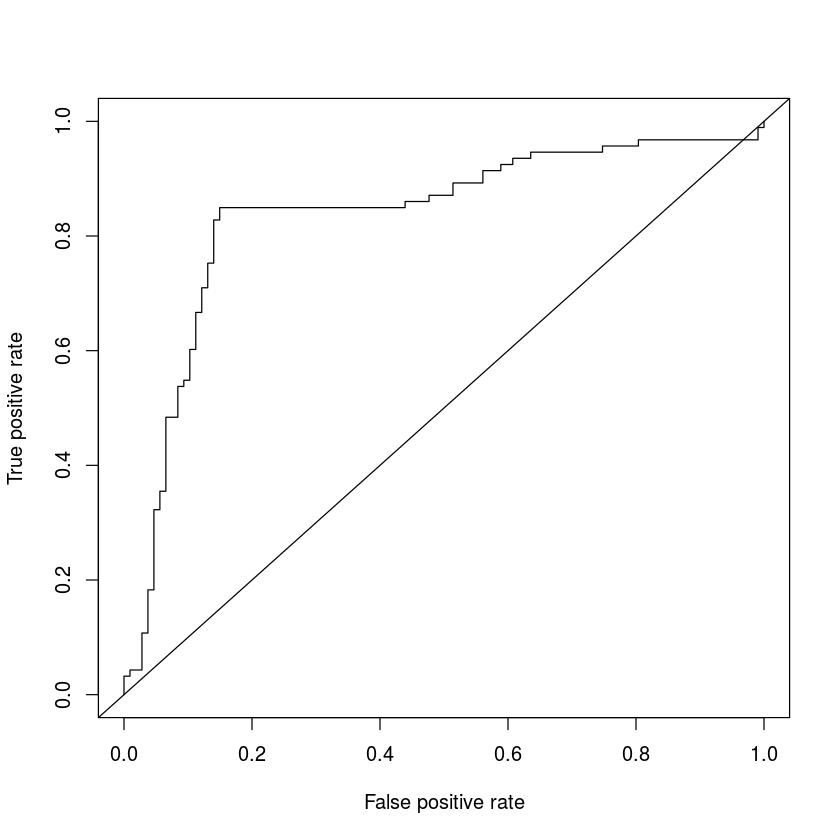

In [27]:
roc.perf = performance(pred, measure = "tpr", x.measure = "fpr")
plot(roc.perf)
abline(a=0, b= 1)


## Example 2

Credits: http://blog.yhat.com/posts/roc-curves.html

## Build a GLM model

In [7]:
library(ggplot2)

diamonds$is_expensive <- diamonds$price > 2400
is_test <- runif(nrow(diamonds)) > 0.75
train <- diamonds[is_test==FALSE,]
test <- diamonds[is_test==TRUE,]

summary(fit <- glm(is_expensive ~ carat + cut + clarity, data=train))


Call:
glm(formula = is_expensive ~ carat + cut + clarity, data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.74788  -0.20185  -0.09189   0.29121   0.81533  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.187707   0.004060 -46.229  < 2e-16 ***
carat        0.828749   0.003551 233.400  < 2e-16 ***
cut.L       -0.003426   0.006268  -0.547    0.585    
cut.Q       -0.031975   0.005526  -5.787 7.24e-09 ***
cut.C        0.025798   0.004819   5.353 8.68e-08 ***
cut^4        0.005951   0.003881   1.533    0.125    
clarity.L    0.116474   0.009525  12.229  < 2e-16 ***
clarity.Q   -0.134829   0.008945 -15.074  < 2e-16 ***
clarity.C    0.086828   0.007669  11.322  < 2e-16 ***
clarity^4   -0.054470   0.006132  -8.883  < 2e-16 ***
clarity^5    0.038885   0.005010   7.761 8.59e-15 ***
clarity^6    0.003200   0.004370   0.732    0.464    
clarity^7   -0.002328   0.003853  -0.604    0.546    
---
Signif. codes:  0 '***' 0.00

## Plot ROC Curve

In [9]:
library(ROCR)

prob <- predict(fit, newdata=test, type="response")
pred <- prediction(prob, test$is_expensive)
perf <- performance(pred, measure = "tpr", x.measure = "fpr")


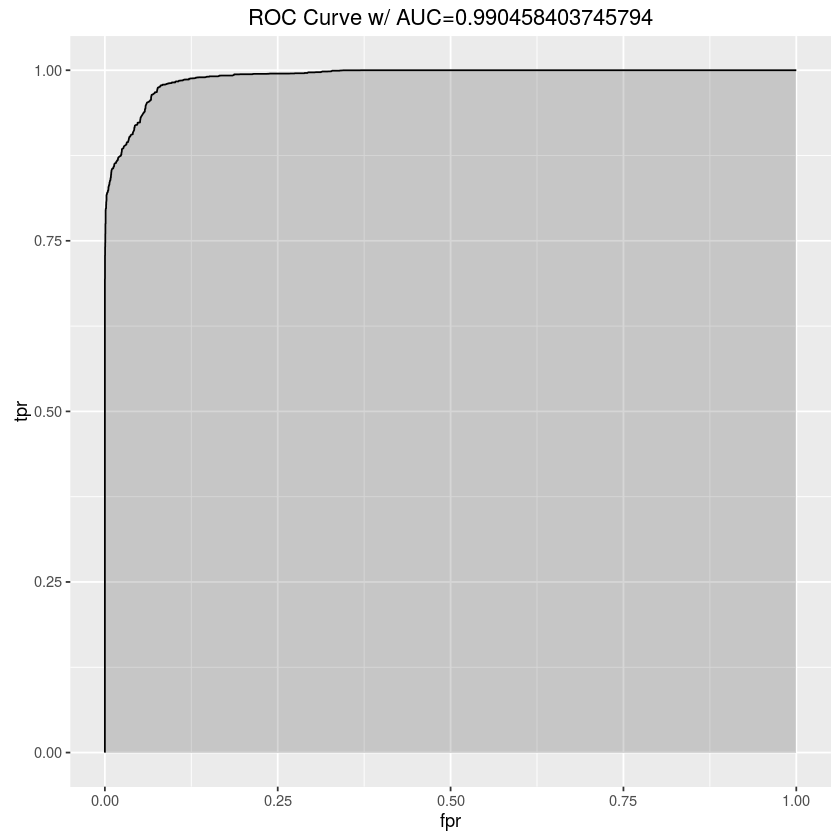

In [11]:
auc <- performance(pred, measure = "auc")
auc <- auc@y.values[[1]]

roc.data <- data.frame(fpr=unlist(perf@x.values),
                       tpr=unlist(perf@y.values),
                       model="GLM")
ggplot(roc.data, aes(x=fpr, ymin=0, ymax=tpr)) +
    geom_ribbon(alpha=0.2) +
    geom_line(aes(y=tpr)) +
    ggtitle(paste0("ROC Curve w/ AUC=", auc))